<a href="https://colab.research.google.com/github/isoittech/udemy-Hands-on-PyTorch/blob/main/06_%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [2]:
# device check
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# webからモデルをダウンロード
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2022-02-17 12:50:56--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.86.38.106, 99.86.38.96, 99.86.38.72, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.86.38.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  78.9MB/s    in 0.6s    

2022-02-17 12:50:57 (78.9 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [4]:
# 存在確認と解凍
!ls

hymenoptera_data.zip  sample_data


In [5]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [6]:
# フォルダ構成の確認
!ls

hymenoptera_data  hymenoptera_data.zip	sample_data


In [7]:
!ls hymenoptera_data

train  val


In [8]:
!ls hymenoptera_data/train

ants  bees


In [19]:
from torchvision.transforms.transforms import Normalize
# 前処理
# ※検証抜きで学習のみとする
transform = transforms.Compose([
    transforms.Resize((224, 224)), # サイズがバラバラなのでリサイズ
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5))
])

In [20]:
# データ取得
train_dataset = datasets.ImageFolder("./hymenoptera_data/train", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [21]:
data_iter = iter(train_loader)

In [22]:
imgs, labels = data_iter.next()
labels # 蟻と蜂

tensor([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1])

In [23]:
imgs.size()

torch.Size([32, 3, 224, 224])

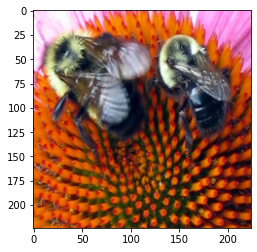

In [24]:
img = imgs[0]
img_permute = img.permute(1, 2, 0) # 次元（順番）入れ替え
img_permute = 0.5 * img_permute + 0.5
img_permute = np.clip(img_permute, 0, 1) # ndarrayの要素の値を任意の範囲内（0～1）に収めるクリッピング
plt.imshow(img_permute)

In [25]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [26]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in model.parameters():
    param.requires_grad = False  # 勾配計算が行われないように。

In [27]:
# modelsの一番最後に存在する層fcを入れ替える
model.fc = nn.Linear(512, 2)

# 変更前はin:512, out:1000

In [28]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
model.to(device) 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [33]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    running_acc /= len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.7232682928442955, acc: 0.5523437261581421
epoch: 1, loss: 0.5432118847966194, acc: 0.741406261920929
epoch: 2, loss: 0.44505226239562035, acc: 0.80859375
epoch: 3, loss: 0.3623972199857235, acc: 0.8984375
epoch: 4, loss: 0.28107696771621704, acc: 0.944531261920929
epoch: 5, loss: 0.2668560706079006, acc: 0.922656238079071
epoch: 6, loss: 0.258379140868783, acc: 0.925000011920929
epoch: 7, loss: 0.22073695622384548, acc: 0.9546874761581421
epoch: 8, loss: 0.19407067261636257, acc: 0.95703125
epoch: 9, loss: 0.1779334368184209, acc: 0.9609375
epoch: 10, loss: 0.17437540832906961, acc: 0.96875
epoch: 11, loss: 0.1473510917276144, acc: 0.9703124761581421
epoch: 12, loss: 0.1500150691717863, acc: 0.9624999761581421
epoch: 13, loss: 0.15532208513468504, acc: 0.9585937261581421
epoch: 14, loss: 0.13127171341329813, acc: 0.9742187261581421


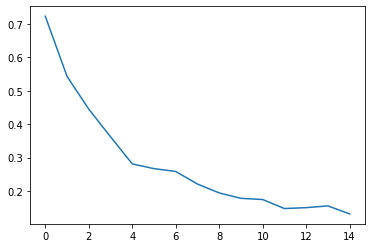

In [34]:
plt.plot(losses)

In [37]:
# plt.plot(accs)
print(accs)

[tensor(0.5523, device='cuda:0'), tensor(0.7414, device='cuda:0'), tensor(0.8086, device='cuda:0'), tensor(0.8984, device='cuda:0'), tensor(0.9445, device='cuda:0'), tensor(0.9227, device='cuda:0'), tensor(0.9250, device='cuda:0'), tensor(0.9547, device='cuda:0'), tensor(0.9570, device='cuda:0'), tensor(0.9609, device='cuda:0'), tensor(0.9688, device='cuda:0'), tensor(0.9703, device='cuda:0'), tensor(0.9625, device='cuda:0'), tensor(0.9586, device='cuda:0'), tensor(0.9742, device='cuda:0')]
